## Wyrażenia regularne

### 1. Wprowadzenie

#### Czym są wyrażenia regularne?

Wyrażenia regularne (*ang. [regular expression](https://en.wikipedia.org/wiki/Regular_expression) aka regex*) to sposób na zapis wzorca tekstowego. Dane tekstowe możemy znaleźć wszędzie zarówno w bazach danych jak i w plikach (na przykład w formacie json, w excelu, czy html - czyli na stronie internetowej).

Mając do dyspozycji takie dane najczęściej chcemy z nich wyciągnąć jakieś konkretne informacje. Znalezienie tych informacji może nie być prostym zadaniem. Wyobraźmy sobie, że przeszukujemy kod setek stron internetowych w poszukiwaniu numerów telefonów (pamiętajmy, że numery telefonów mogą mieć różny format, mogą być rozdzielone specją lub myślnikiem, posiadać lub nie numer kierunkowych z nawiasami lub bez, może pojawić się znak "+"). Tradycyjne *ctrl+f* niewiele pomoże. Z pomocą przychodzą nam właśnie **wyrażenia regularne**.

Wyrażenia regularne to nie nowy język programowania. To zwięzły sposób zapisu wzorca tekstowego. Spróbujmy stworzyć **opis słowny** wzorca reprezentującego numer telefonu: 

<code>trzy cyfry z zakresu 0-9 poprzedzone opcjonalnymi dwoma cyframi z zakresu 0-9. Obie grupy cyfr mogą być opcjonalnie rozdzielone dowolną liczbą spacji lub jednym myślnikiem. Grupa dwóch cyfr może być opcjonalnie otoczona nawiasami okrągłymi, przed nią lub tymi nawiasami opcjonalnie występuje znak "+". 
</code>

Jest to opis początku wzorca numeru telefonu. Dokładny, ale trochę rozwlekły i trudny do zaimplementowania. Wyrażenia regularne pozwalają nam w zwięzły sposób zapisać taki wzorzec. Ten sam opis zapisany za pomocą **wyrażeń regularnych** może mieć postać:

`(\+?(?[0-9])?)?[ -][0-9]{3}`

Taki zapis jest jeszcze precyzyjniejszy od opisu słownego, a do tego jest znacznie bardziej zwięzły. W tym rozdziale nauczymy się co oznaczają poszczególne symbole (nazywane metaznakami) i w jaki sposób samodzielnie tworzyć taki zapis.

Ponadto poznamy bibliotekę *re*. Większość współczesnych języków programowania wspiera wyrażenia regularne. W python-ie do obsługi wyrażeń regularnych mamy właśnie bibliotekę *[`re`](https://docs.python.org/3/library/re.html)*. 

### 2. Rys historyczny

##### Stephen Cole Kleene i teoria automatów

Koncepcja wyrażeń regularnych została opracowana w 1951 roku przez amerykańskiego matematyka - [Stephen Cole Kleene](https://en.wikipedia.org/wiki/Stephen_Cole_Kleene). 

Stephen Cole Kleene zajmował się badaniem [języków formalnych](https://pl.wikipedia.org/wiki/J%C4%99zyk_formalny). Był jednym z ojców tzw. [teorii automatów](https://en.wikipedia.org/wiki/Automata_theory) dzisiaj stanowiącej jeden z trzech fundamentalnych działów tzw. [teorii obliczeń](https://pl.wikipedia.org/wiki/Teoria_oblicze%C5%84) - najbardziej abstrakcyjnego i teoretycznego przedmiotu w programie studiów informatycznych. Więcej o teorii automatów można poczytać na przykład [tutaj](https://www.mimuw.edu.pl/~szymtor/jao/skrypt.pdf). Jest to skrypt zawieszony na stronach mimuw. W ogóle, Wydział Matematyki, Informatyki i Mechaniki Uniwersytetu Warszawskiego (w skrócie mimuw) posiada świetną [bazę materiałów dydaktycznych](https://wazniak.mimuw.edu.pl/index.php?title=Strona_g%C5%82%C3%B3wna), z którą warto zapoznać się, kiedykolwiek chcemy zgłębić jakiś temat z zakresu informatyki.

##### Ken Thompson i grep

Wyrażenia regularne, początkowo nazywane 'zdarzeniami regularnymi' (*ang. regular events*) do 1968 roku funkcjonowały głównie w matematycznych pracach naukowych. W 1968 stały się popularne za sprawą Ken Thompson-a, który zastosował wzorce regularne w dwóch obszarach:
- wyszukiwania wzorców słownych (*ang. pattern matching*) w edytorach tekstowych
- analizy leksykalnej w kompilatorach

[Ken Thompson](https://en.wikipedia.org/wiki/Ken_Thompson) (jeden z głównych twórców takich języków jak `C`, czy `Go` oraz systemu `UNIX`) dodał obsługę wyrażeń regularnych w edytorze `QED`. Niedługo potem dodał też wyrażenia regularne do popularnego w tamtych latach unixowego edytora `ed`, dając w ten sposób początek popularnemu do dzisiaj silnikowi wyszukiwań wzorców w tekście `grep`. Nazwa grep pochodzi od komendy jaką w edytorze 'ed' stosowano do wyszukiwania *`g/re/p`*. W komendzie flaga `g` oznaczała przeszukiwanie globalne, *ang. global* (tzn. w całym tekście), a flaga `p` ozanaczała wyświetlanie linii zawierających dopasowanie, *ang. print* - "**G**lobal search for **R**egular **E**xpression and **P**rint matching lines". W tym samym czasie grupa naukowców pod przewodnictwem Douglas T. Ross opracowała oparte o wyrażenia regularne narzędzie do analizy leksykalnej kompilatorów.

##### Standaryzacja - POSIX i PCRE

W latach 70 w [Bell Labs](https://en.wikipedia.org/wiki/Bell_Labs) powstawało dużo opartych o wyrażenia regularne, unixowych narzędzi do przetwarzania tekstu. Do popularniejszych należą: `lex`, `sed`, `AWK`, `expr`. Wyrażenia regularne zaczęły być powszechnie wykorzystywane w edytorach tekstowych, takich jak `vim` czy `Emacs`. Wiele rozwiązań posiadało własne, niekompatybline wersje wyrażeń regularnych. Jeżeli chciało się używać różnych narzędzi, konieczne było nauczenie się różnych wersji zapisu wyrażeń regularnych. W związku z tym naturalną potrzebą stało się opracowanie standardu i ujednolicenie zapisu. W 1992 roku wyrażenia regularne zostały ustandaryzowane w ramach znacznie szerszego standardu POSIX.2.

[POSIX (**P**ortable **O**perating **S**ystem **I**nterface)](https://en.wikipedia.org/wiki/POSIX#POSIX.2) jest rodziną standardów tworzoną od 1988 i posiada oznaczenie IEEE 1003. Standard POSIX zaczął być tworzony na skutek powstawania w latach 80 wielu niekompatyblinych systemów operacyjnych opartych na systemie UNIX. Głównym celem POSIX było opracowanie jednolitego standardu systemowego dla wszystkich systemów UNIX.

Równolegle w latach 80 rozwijany był w Perl silnik wyrażeń regularnych wyraźnie rozbudowujący ówczesne możliwości wyrażeń regularnych m.in. o takie funkcje jak `lookahead`, `lookbehind`, czy `non-capturing groups`. Ostatecznie doprowadziło to do powstania alternatywnego do POSIX standardu PCRE (**P**erl **C**ompatible **R**egular **E**xpressions). PCRE ze względu na bogatszy zasób narzędzi jest dzisiaj domyślnym standardem w wielu narzędziach takich jak bazy PostgreSQL, czy języki Perl, PHP, Java, JavaScript, czy Python. Standard POSIX pozostał głównie w narzędziach unixowych do przetwarzania tekstu, takich jak `grep`, `sed` i `awk`.

Niestety stosując różne narzędzia przekonamy się, że pomiędzy nimi wciąż znaleźć można drobne różnice niezależne od zadeklarowanego standardu. Różnice są na tyle nieduże, że nie nazywamy ich już standardami, a dialektami wyrażeń regularnych. 

Podsumowując, dwa podstawowe standardy wyrażeń regularnych to POSIX oraz PCRE. Oba standardy różnią się wyraźnie pomiędzy sobą. Obecnie standard POSIX jest znacznie mniej popularny. Implementacje tych standardów w różnych narzędziach najczęściej różnią się między sobą nieznacznie. Poszczególne implementacje nazywamy dialektami.

Dzisiaj ze względu na znacznie większą popularność standardu PCRE zaciera się różnica pomiędzy terminami standard, a dialekt wyrażeń regularnych. Najczęściej stosowanym stał się termin "odmiana wyrażeń regularnych" (*ang. Regular Expression Flavor*) lub "silnik wyrażeń regularnych" (*ang. Regular Expression Engine*). Obecny stan znajduje swoje odzwierciedlenie w uniwersalnych narzędziach do wyrażeń regularnych. Jednym z najlpopularniejszych jest platforma [regex101](https://regex101.com/), która daje możliwość wybrania odmiany przed zapisaniem wyrażenia.

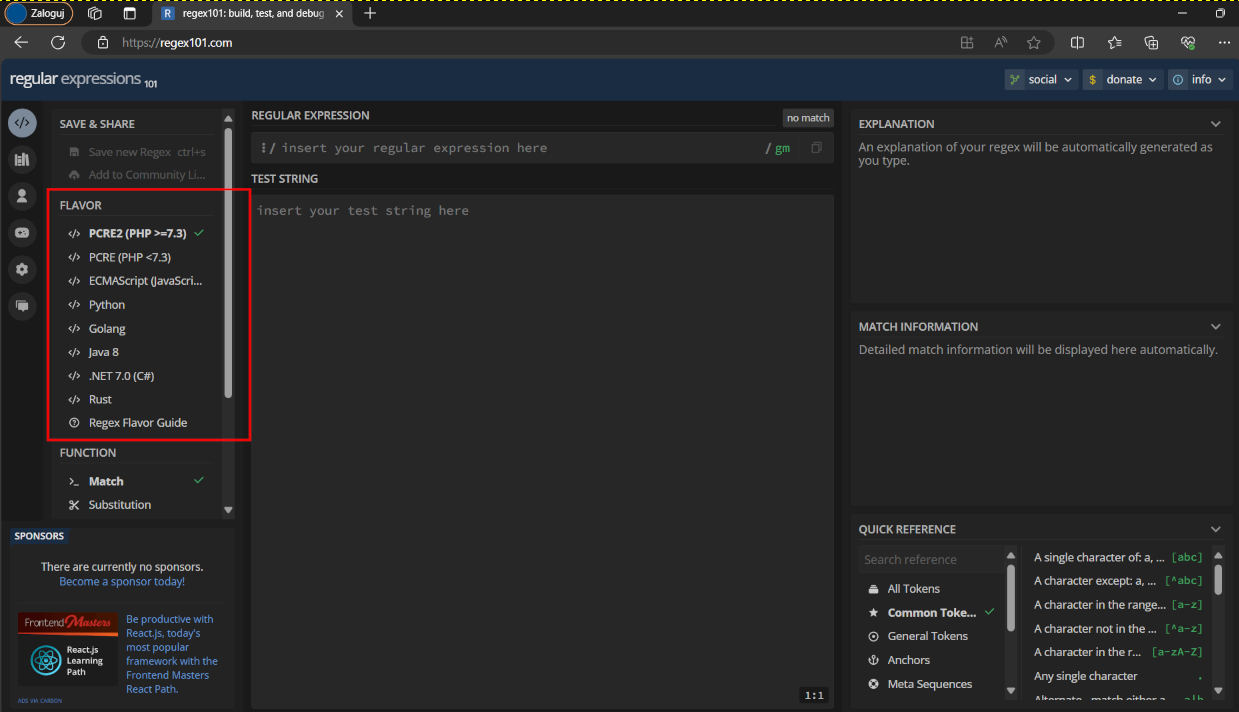

Kompleksowe porównanie najpopularniejszych dzisiaj silników wyrażeń regularnych można znaleć na stronie: https://gist.github.com/CMCDragonkai/6c933f4a7d713ef712145c5eb94a1816 

### 3. Standard POSIX

W wyrażeniach regularnych większość znaków traktowana jest jako literały (tzn. znak oznacza wyłącznie samego siebie, przykład: znak 'a' oznacza wyłącznie znak 'a', a nie na przykład 3 dowolne znaki alfabetyczne). Znaki, które mają specjalne znaczenie nazywane są metaznakami (*ang. metacharacters*) lub metasekwencjami (*ang. metasequences*).

Standard POSIX pierwotnie wyróżniał trzy schematy wyrażeń regularnych:
- BRE (**B**asic **R**egular **E**xpressions)
- ERE (**E**xtended **R**egular **E**xpressions)
- SRE (**S**imple **R**egular **E**xpressions)

BRE i ERE powstały, żeby zastąpić początkowy SRE. Dzisiaj SRE uznawany jest już za przestarzały i nie jest dłużej wspierany.

W systemach GNU (**G**NU's **N**ot a **U**NIX), różnica pomiędzy BRE i ERE jest niewielka i sprowadza się tylko do trzech znaków "?", "+", "|" oraz sposobu używania nawiasów.

W standardzie POSIX Basic Regular Expression (**BRE**) do metaznaków należą:

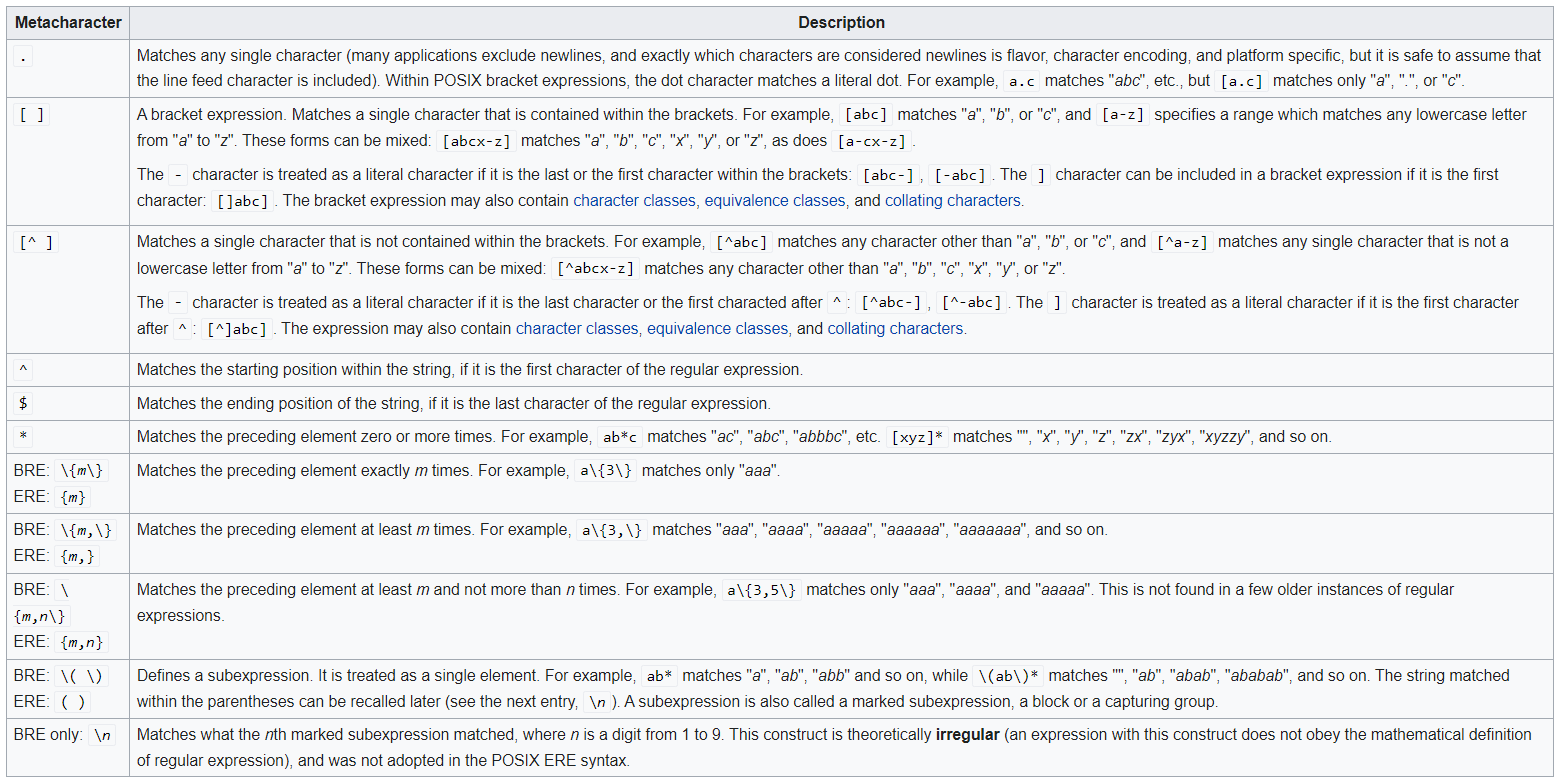

Więcej na temat POSIX BRE znajdziesz na przykład [tutaj](https://www.regular-expressions.info/posix.html)

W standardzie POSIX Extended Regular Expression (**ERE**) wprowadzone zostały trzy dodatkowe metaznaki

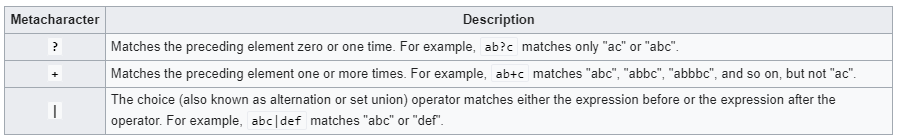

Więcej na temat POSIX ERE znajdziesz na przykład [tutaj](https://www.boost.org/doc/libs/1_71_0/libs/regex/doc/html/boost_regex/syntax/basic_extended.html)

Omówimy metaznaki standardu POSIX, ponieważ jest to zestaw podstawowych znaków wykorzystywanych praktycznie we wszystkich silnikach. Na koniec wspomnimy o dodatkowych możliwościach jakie daje zastosowanie metaznaków standardu PCRE.

### 4. Zestawienie podstawowych metaznaków wyrażeń regularnych

#### Dopasowanie pojedynczego znaku
| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `.`      | Dowolny znak               | Pasuje do dowolnego znaku z wyjątkiem znaku nowej linii.                        | `a.b`                         | Pasuje do "aab", "acb", ale nie do "ab".                                      |
| `[]`     | Klasa znaków               | Pasuje do dowolnego znaku ze zbioru znaków pomiędzy [].                              | `[abc]`                       | Pasuje do "a", "b", "c".                                                     |
| `[^]`    | Negacja w klasie znaków    | Pasuje do dowolnego znaku, który nie znajduje się w zbiorze znaków pomiędzu [].             | `[^abc]`                      | Pasuje do dowolnego znaku poza "a", "b", "c".                                |
| `[-]`    | Zakres znaków              | Pasuje do dowolnego znaku ze wskazanego zakresu znaków.                          | `[a-z]`                      | Pasuje do dowolnego znaku pomiędzy znakami "a", "z" (włącznie z tymi znakami)  |

#### Kotwice

| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `^`      | Początek ciągu znaków/linii             | Pasuje do początku ciągu znaków/linii.                                                 | `^abc`                        | Pasuje do "abc" tylko na początku ciągu znaków/linii.                                     |
| `$`      | Koniec ciągu znaków/linii               | Pasuje do końca ciągu znaków/linii.                                                    | `abc$`                        | Pasuje do "abc" tylko na końcu ciągu znaków/linii.                                        |


#### Kwantyfikatory

| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `*`      | Zero lub więcej            | Pasuje do zera lub więcej wystąpień poprzedzającego znaku.                | `ab*c`                        | Pasuje do "ac", "abc", "abbc".                                               |
| `+`      | Jedno lub więcej           | Pasuje do jednego lub więcej wystąpień poprzedzającego znaku.             | `ab+c`                        | Pasuje do "abc", "abbc", ale nie do "ac".                                    |
| `?`      | Zero lub jedno             | Pasuje do zera lub jednego wystąpienia poprzedzającego znaku.         | `ab?c`                        | Pasuje do "ac" lub "abc".                                                    |
| `{}`     | Dokładna liczba wystąpień  | Pasuje do określonej liczby wystąpień poprzedzającego znaku.              | `a{2}`                        | Pasuje do "aa".                                                              |
| `{min,max}` | Zakres liczby wystąpień | Pasuje do określonego zakresu liczby wystąpień poprzedzającego znaku.     | `a{1,3}`                      | Pasuje do "a", "aa", "aaa".             

#### Znak ucieczki

| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `\`      | Ucieczka znaków specjalnych| Umożliwia dopasowanie znaków specjalnych. Ponadto niektórym znakom nadaje inne znaczenie (patrz metaznaki ze znakiem `\`).                                 | `\.`                          | Pasuje do ".".                                                               |

#### Alternacja

| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `\|`      | Alternacja                 | Pasuje do dowolnego z alternatywnych wzorców.                             | `a\|b`                         | Pasuje do "a" lub "b".                                                       |


#### Grupowanie

| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `()`     | Grupa                      | Grupuje wyrażenia regularne.                                              | `(abc)+`                      | Pasuje do "abc", "abcabc", ale nie do "ab".                                  |

#### Metaznaki reprezentujące białe znaki tabeli ASCII

| Metaznak | Nazwa              | Definicja                                     |
|----------|--------------------|-----------------------------------------------|
| `\t`     | Tabulator          | Znak tabulatora                               |
| `\r`     | Powrót karetki     | Znak powrotu karetki                          |
| `\n`     | Nowa linia         | Znak nowej linii                              |
| `\f`     | Przewijanie strony | Znak przewijania strony                       |
| `\a`     | Dźwięk alarmu      | Znak dźwięku alarmu (dzwonek)                 |
| `\e`     | Znak escape        | Znak escape                                   |
| `\v`     | Pionowy tabulator  | Znak pionowego tabulatora                     |
| `\\`     | Backslash          | Znak backslash (`\`)                          |
| `\0`     | Null               | Znak null (o wartości 0)                      |

#### Metasekwencje ze znakiem `\`
| Metaznak | Nazwa                      | Definicja                                                                 | Przykład                       | Opis przykładu                                                               |
|----------|----------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| `\d`     | Cyfra                      | Pasuje do dowolnej cyfry.                                                 | `\d`                          | Pasuje do "0", "1", "2", ..., "9".                                           |
| `\D`     | Nie-cyfra                  | Pasuje do dowolnego znaku, który nie jest cyfrą.                          | `\D`                          | Pasuje do dowolnego znaku poza "0"-"9".                                      |
| `\w`     | Znak słowa                 | Pasuje do dowolnego znaku alfanumerycznego oraz podkreślenia.             | `\w`                          | Pasuje do "a", "b", "1", "_".                                                |
| `\W`     | Nie-znak słowa             | Pasuje do dowolnego znaku, który nie jest alfanumeryczny ani podkreśleniem.| `\W`                          | Pasuje do dowolnego znaku poza "a"-"z", "A"-"Z", "0"-"9", "_".               |
| `\s`     | Biały znak                 | Pasuje do dowolnego białego znaku.                                        | `\s`                          | Pasuje do spacji, tabulacji, znaku nowej linii.                              |
| `\S`     | Nie-biały znak             | Pasuje do dowolnego znaku, który nie jest białym znakiem.                 | `\S`                          | Pasuje do dowolnego znaku poza spacją, tabulacją, znakiem nowej linii.       |
| `\b`     | Granica słowa              | Pasuje do granicy słowa.                                                  | `\bword\b`                    | Pasuje do "word" jako całe słowo.                                            |
| `\B`     | Nie-granica słowa          | Pasuje do miejsca, które nie jest granicą słowa.                          | `\Bword\B`                    | Pasuje do "password" jako część innego słowa.                                |
`\K`       | Reset                      | Resetuje dotychczasowe dopasowanie nie resetując pozycji kursora          | `\d+\Kala`                    | Pasuje do "ala", które następuje po dowolnej liczbie (dopasuje samo słowo "ala" ignorując poprzedzającą je liczbę) |


#### Zapis wybranych, podstawowych metasekwencji ze znakiem `\` za pomocą prostych wyrażeń regularnych.

| Metasekwencja | Opis                          | Regex                       |
|----------------|-------------------------------|-----------------------------|
| `\d`           | Dowolna cyfra                 | `[0-9]`                     |
| `\D`           | Dowolny znak, który nie jest cyfrą | `[^0-9]`                 |
| `\w`           | Dowolny znak alfanumeryczny lub podkreślnik | `[A-Za-z0-9_]` |
| `\W`           | Dowolny znak niealfanumeryczny | `[^A-Za-z0-9_]`            |
| `\s`           | Dowolny znak biały (spacja, tabulator, nowa linia) | `[ \t\r\n\f]` |
| `\S`           | Dowolny znak, który nie jest białym znakiem | `[^ \t\r\n\f]` |


### 5. Zestawienie flag 

Platforma `regex101` posiada również opcje wyboru flag, które modyfikują działanie silnika wyrażeń regularnych.

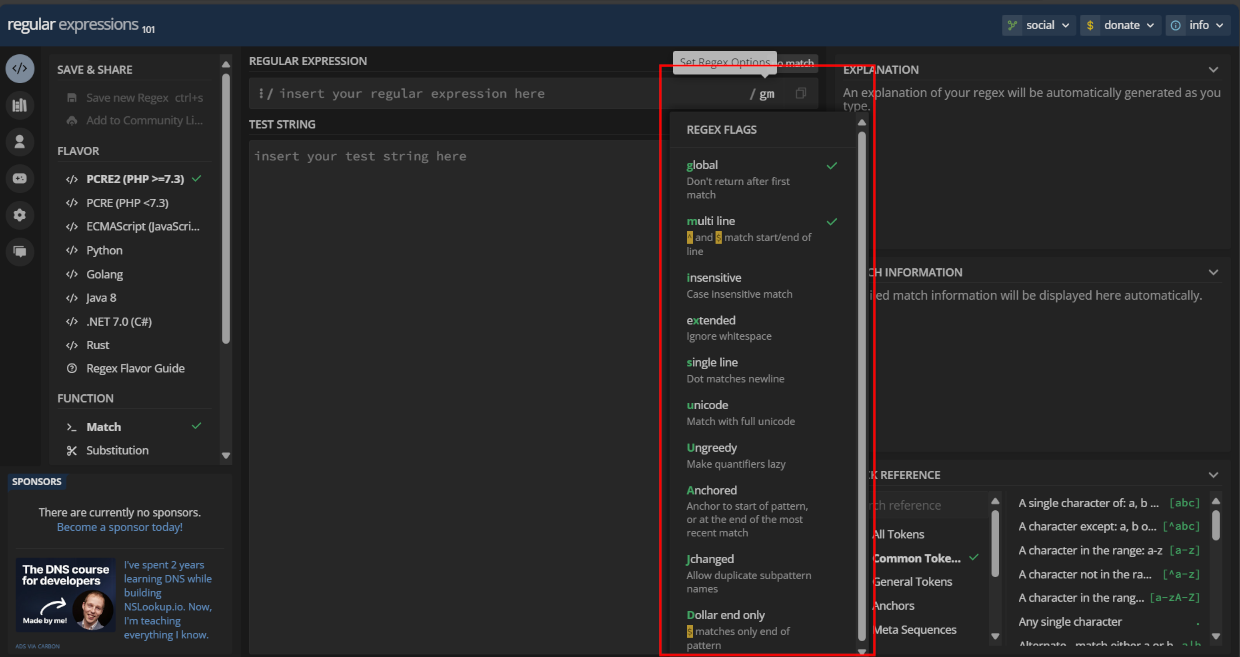

Zestawienie flag

| Flaga             | Opis                                                                                          | Przykład/Zastosowanie                                           |
|-------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| `g (`**g**`lobal)`      | Wyszukuje wszystkie wystąpienia wzorca w tekście, a nie tylko pierwsze dopasowanie.           | `/pattern/g`                                                   |
| `m (`**m**`ultiline)`   | Umożliwia dopasowanie początku i końca każdej linii w wieloliniowym tekście.                  | `/^start/m`                                                    |
| `i (`**i**`nsensitive)` | Ignoruje wielkość liter przy dopasowaniu.                                                     | `/pattern/i`                                                   |
| `x (e`**x**`tended)`    | Pozwala na bardziej przejrzyste wzorce przez ignorowanie białych znaków i komentarzy.         | `/pattern/x`                                                   |
| `s (`**s**`ingle line)`      | Umożliwia dopasowanie znaku nowej linii przez kropkę `.`.                                     | `/pattern/s`                                                   |
| `u (`**u**`nicode)`     | Umożliwia dopasowanie wzorców zgodnie ze standardem Unicode.                                  | `/pattern/u`                                                   |
| `U (`**U**`ngreedy)`    | Odwraca domyślne zachowanie chciwego dopasowania, powodując, że operator `*`, `+` i `{}` stają się niechciwe (dopasowują jak najmniej znaków). | `/pattern/U`                                                   |
| `A (`**A**`nchored)`       | Wymusza dopasowanie wzorca tylko na początku tekstu.                                          | `/pattern/A`                                                   |
| `J (`**J**`changed)`       | Pozwala na wielokrotne użycie we wzorcu tej samej nazwy grupy.                                | `/pattern/J`                                                   |
| `D (`**D**`ollar end only)`| Wymusza, aby znak dolara `$` dopasowywał tylko koniec tekstu, a nie koniec linii w trybie wieloliniowym. | `/pattern/$`                                                   |


### 6. Dodatkowe materiały

Lista ciekawych stron w tematyce wyrażeń regularnych:
- interaktywne kompilatory regexów:
  - [regex101](https://regex101.com/)
  - [regexr](https://regexr.com/)
  - [pythex](https://pythex.org/)
- gry:
  - [regexcrossword](https://regexcrossword.com/)
  - [play.inginf](http://play.inginf.units.it/)
- kompedium wiedzy:
  - [regular-expression.info](https://www.regular-expressions.info/)
  - [wikibooks](https://en.wikibooks.org/wiki/Regular_Expressions)
  - [wazniak.mimuw.edu.pl](https://wazniak.mimuw.edu.pl/index.php?title=%C5%9Arodowisko_programisty/Wyra%C5%BCenia_regularne)
